In [4]:
#import Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read input dataset
data =  pd.read_csv('data\iris.data', header=None, names=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'species'])


In [6]:
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Describe dataset
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#get info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


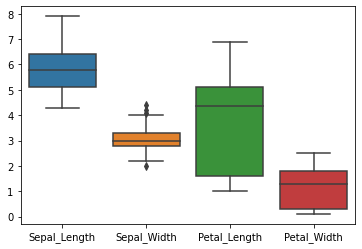

In [9]:
# Check for outliers
sns.boxplot(data = data);

In [10]:
# there is outliers in Sepal Width
Q1 = data.Sepal_Width.quantile(0.25)
Q3 = data.Sepal_Width.quantile(0.75)
IQR = Q3 - Q1
IQR

0.5

In [11]:
# filter data using 1.5 IQR
# outlier rows
data[(data['Sepal_Width'] < (Q1 - 1.5 *IQR)) | (data['Sepal_Width'] > (Q3 + 1.5 *IQR))]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [12]:
# droping outliers
data = data[~((data['Sepal_Width'] < (Q1 - 1.5 *IQR)) | (data['Sepal_Width'] > (Q3 + 1.5 *IQR)))]

In [13]:
data.shape

(146, 5)

In [14]:
#check for missing data
data.isna().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
species         0
dtype: int64

In [15]:
# no missing values

In [16]:
#drop duplicate data instances if any
data.duplicated().sum()

3

In [17]:
# droping duplicates
data.drop_duplicates(inplace=True)

In [18]:
data.shape

(143, 5)

In [19]:
#find number of unique classes
data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
#Check if dataset is balanced
data.species.value_counts()

Iris-versicolor    49
Iris-virginica     49
Iris-setosa        45
Name: species, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


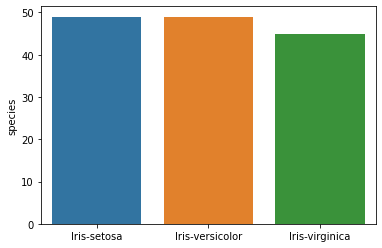

In [21]:
# data is balanced
sns.barplot(data.species.unique(), data.species.value_counts());

# Visualization visual inspection of dataset

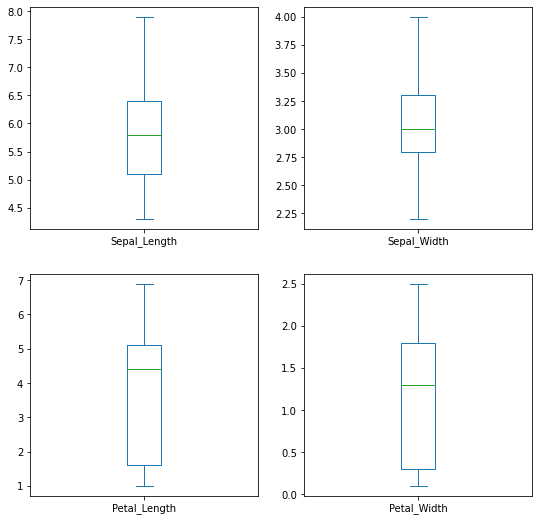

In [22]:
#Box Plot for each input variable
data.plot(kind ='box',subplots=True, layout=(2,2), figsize=(9,9));

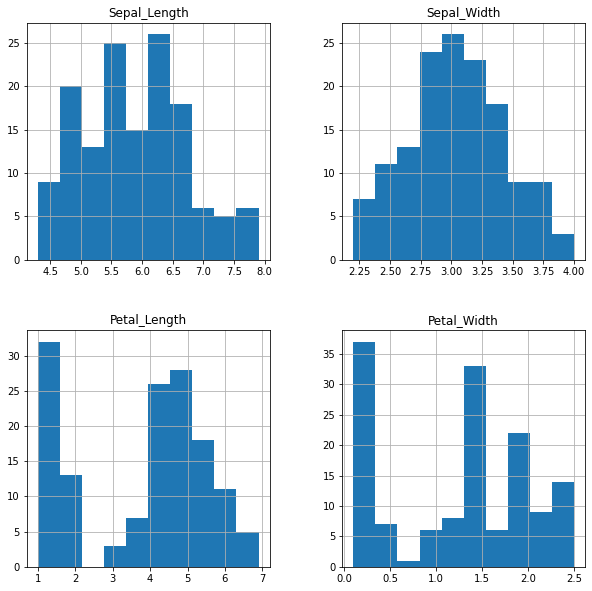

In [23]:
#Histogram Plot for each input variable
data.hist( layout=(2,2), figsize=(10,10));

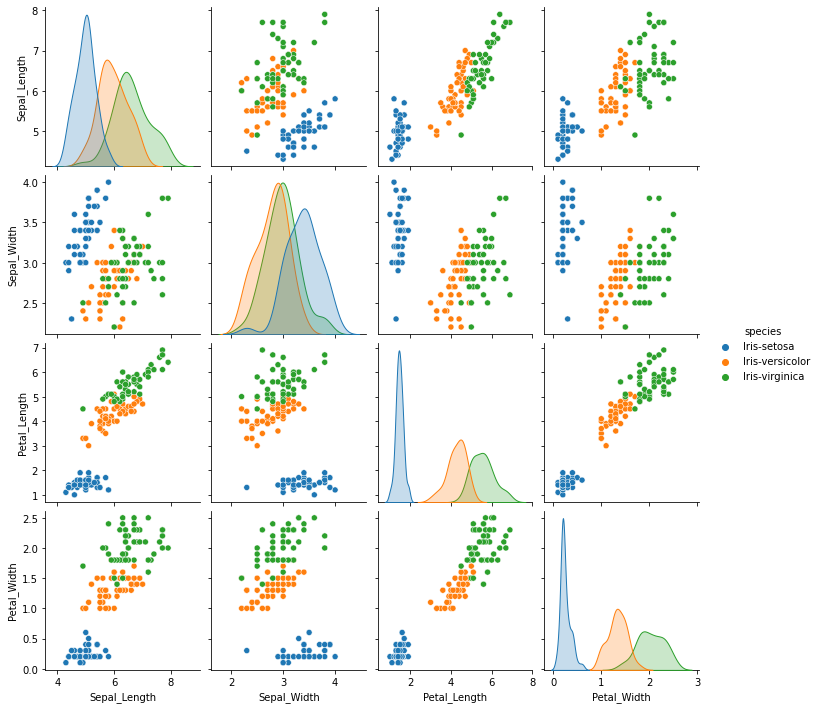

In [24]:
#scatter Plot for two input variables
sns.pairplot(data, hue='species');

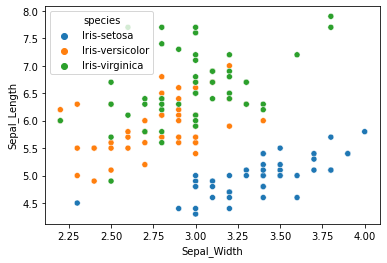

In [25]:
# Prepare scatter plots - `sepal_width` vs `sepal_length` 
sns.scatterplot(x ='Sepal_Width',y = 'Sepal_Length', data=data, hue='species');

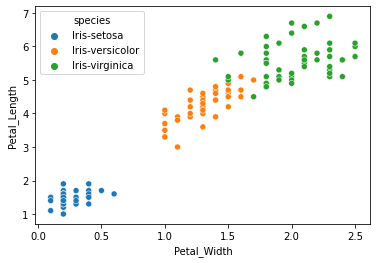

In [26]:
# prepare scatter plots -  `petal_width` vs `petal_length`. 
sns.scatterplot(x ='Petal_Width',y = 'Petal_Length', data=data, hue='species');

In [27]:
#Statistical Summary after cleaning
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,143.000000,143.000000,143.000000,143.000000
mean,5.870629,3.038462,3.830769,1.230769
std,0.835045,0.398222,1.750824,0.754538
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [28]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features= ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

def create_75_25_split():
    X_train, X_test, y_train, y_test = train_test_split(data[features], data.species, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [29]:
X= data[features]
y= data.species
scaler = MinMaxScaler()

def change_split_ratio( x1, y1, test_size =0.2):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(x1,y1 , random_state=0, test_size= test_size)
    # Scale the data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    #return
    return X_train, X_test, y_train, y_test
    

In [30]:
X_train, X_test, y_train, y_test =create_75_25_split()

## KNeighborsClassifier

In [31]:
#K nearest nighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.94


#### 6-For the KNeighborsClassifier, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50

-------------------- K =  1 ----------------------
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.94


-------------------- K =  3 ----------------------
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.94


-------------------- K =  5 ----------------------
Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.94


-------------------- K =  7 ----------------------
Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.94


-------------------- K =  10 ----------------------
Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.94


-------------------- K =  20 ----------------------
Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.94


-------------------- K =  30 ----------------------
Accuracy of K-NN classifier on training set: 0.93
Ac

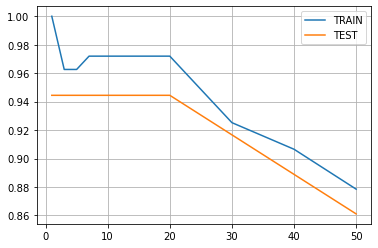

In [32]:
train_score_lst = []
test_score_lst = []

for k in [1, 3, 5, 7, 10, 20, 30, 40, 50]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    # append to lists
    train_score_lst.append(train_score)
    test_score_lst.append(test_score)
    # printing
    print('-'*20, 'K = ',k , '-'*22)
    print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
    print('\n')
#plotting
plt.plot( [1, 3, 5, 7, 10, 20, 30, 40, 50], train_score_lst, label="TRAIN")
plt.plot( [1, 3, 5, 7, 10, 20, 30, 40, 50], test_score_lst, label="TEST")
plt.grid()
plt.legend();

#### 7-Generate 10 random train/test splits for and Fit the model for each split and generate predictions Average the accuracy score for each `k` Calculate the average number of correct predictions for each `k` as well Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?

In [33]:
def find_best_split_ratio( model_name, model = KNeighborsClassifier(n_neighbors=7) , log=True):
    # store values for plotting
    train_score_lst = []
    test_score_lst = []
    # loop through split values
    for s in np.linspace(0.05,0.95,10):
        X_train, X_test, y_train, y_test = change_split_ratio( x1=X, y1=y, test_size =s)
        model.fit(X_train, y_train)
        # append to lists
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        train_score_lst.append(train_score)
        test_score_lst.append(test_score)
        # printing
        if log:
            print('-'*15, 'Test size = ',round(s,2) , '-'*17)
            print('Accuracy of {} classifier on training set: {:.2f}'.format(model_name, train_score))
            print('Accuracy of {} classifier on test set: {:.2f}'.format(model_name, test_score))
            print('\n')

    #plotting
    plt.plot( np.linspace(0.05,0.95,10), train_score_lst, label="TRAIN")
    plt.plot( np.linspace(0.05,0.95,10), test_score_lst, label="TEST")
    plt.grid()
    plt.xlabel('Test Size')
    plt.ylabel('Accuracy')
    plt.legend();

--------------- Test size =  0.05 -----------------
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


--------------- Test size =  0.15 -----------------
Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.95


--------------- Test size =  0.25 -----------------
Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.94


--------------- Test size =  0.35 -----------------
Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.94


--------------- Test size =  0.45 -----------------
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.95


--------------- Test size =  0.55 -----------------
Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.94


--------------- Test size =  0.65 -----------------
Accuracy of K-NN classifier on training set: 0.9

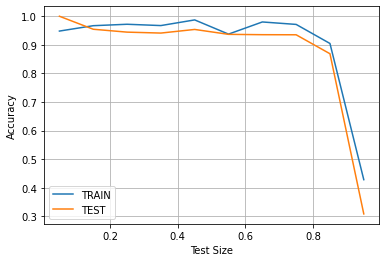

In [34]:
find_best_split_ratio( 'K-NN', model = KNeighborsClassifier(n_neighbors=7), log=True )

## Logistic Regression

In [35]:
X_train, X_test, y_train, y_test =create_75_25_split()

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.93
Accuracy of Logistic regression classifier on test set: 0.89


--------------- Test size =  0.05 -----------------
Accuracy of Logistic regression classifier on training set: 0.93
Accuracy of Logistic regression classifier on test set: 0.88


--------------- Test size =  0.15 -----------------
Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.95


--------------- Test size =  0.25 -----------------
Accuracy of Logistic regression classifier on training set: 0.93
Accuracy of Logistic regression classifier on test set: 0.89


--------------- Test size =  0.35 -----------------
Accuracy of Logistic regression classifier on training set: 0.92
Accuracy of Logistic regression classifier on test set: 0.90


--------------- Test size =  0.45 -----------------
Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.91


--------------- Test size =  0.55 -----------------
Accuracy of Logistic regression classifier on tr

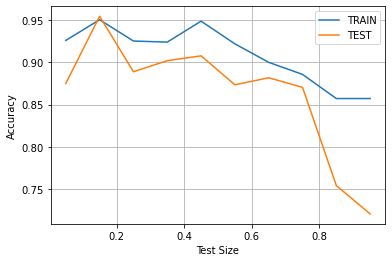

In [37]:
find_best_split_ratio( 'Logistic regression', model = LogisticRegression(), log=True )

## DecisionTreeClassifier

In [38]:
X_train, X_test, y_train, y_test =create_75_25_split()

In [39]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.94


-------------------- max_depth =  1 ----------------------
Accuracy of Decision Tree  classifier on training set: 0.69
Accuracy of Decision Tree  classifier on test set: 0.56


-------------------- max_depth =  3 ----------------------
Accuracy of Decision Tree  classifier on training set: 0.98
Accuracy of Decision Tree  classifier on test set: 0.92


-------------------- max_depth =  5 ----------------------
Accuracy of Decision Tree  classifier on training set: 1.00
Accuracy of Decision Tree  classifier on test set: 0.94


-------------------- max_depth =  7 ----------------------
Accuracy of Decision Tree  classifier on training set: 1.00
Accuracy of Decision Tree  classifier on test set: 0.94


-------------------- max_depth =  10 ----------------------
Accuracy of Decision Tree  classifier on training set: 1.00
Accuracy of Decision Tree  classifier on test set: 0.94


-------------------- max_depth =  20 ----------------------
Accuracy of Decision Tree  classifier on training set:

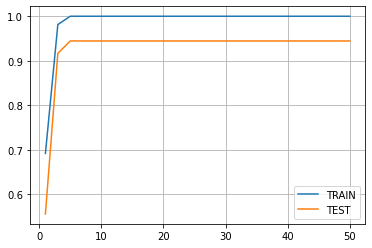

In [40]:
train_score_lst = []
test_score_lst = []

for d in [1, 3, 5, 7, 10, 20, 30, 40, 50]:
    model = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    # append to lists
    train_score_lst.append(train_score)
    test_score_lst.append(test_score)
    # printing
    print('-'*20, 'max_depth = ',d , '-'*22)
    print('Accuracy of Decision Tree  classifier on training set: {:.2f}'.format(train_score))
    print('Accuracy of Decision Tree  classifier on test set: {:.2f}'.format(test_score))
    print('\n')
#plotting
plt.plot( [1, 3, 5, 7, 10, 20, 30, 40, 50], train_score_lst, label="TRAIN")
plt.plot( [1, 3, 5, 7, 10, 20, 30, 40, 50], test_score_lst, label="TEST")
plt.grid()
plt.legend();

In [41]:
def find_best_hyperparameters(hyper_name, model_name, values, model_func, log =True):
    # Store values for plotting
    train_score_lst = []
    test_score_lst = []

    for v in values:
        model = model_func(max_depth=v ).fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        # append to lists
        train_score_lst.append(train_score)
        test_score_lst.append(test_score)
        # printing
        if log :
            print('-'*20, hyper_name, ' = ',v , '-'*22)
            print('Accuracy of {} classifier on training set: {:.2f}'.format(model_name, train_score))
            print('Accuracy of {} classifier on test set: {:.2f}'.format(model_name, test_score))
            print('\n')
    #plotting
    plt.plot( values, train_score_lst, label="TRAIN")
    plt.plot( values, test_score_lst, label="TEST")
    plt.xlabel(hyper_name)
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend();

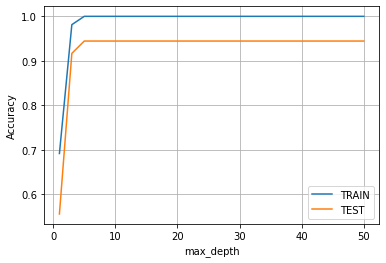

In [42]:
find_best_hyperparameters('max_depth', 'Decision Tree',
                         [1, 3, 5, 7, 10, 20, 30, 40, 50], DecisionTreeClassifier,log =False)

--------------- Test size =  0.05 -----------------
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


--------------- Test size =  0.15 -----------------
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.91


--------------- Test size =  0.25 -----------------
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.94


--------------- Test size =  0.35 -----------------
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.94


--------------- Test size =  0.45 -----------------
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


--------------- Test size =  0.55 -----------------
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set:

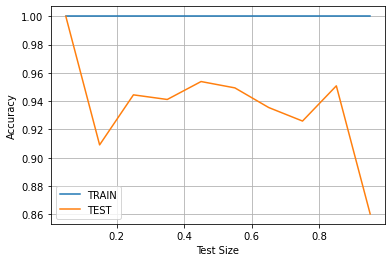

In [43]:
find_best_split_ratio( 'Decision Tree', model = DecisionTreeClassifier(max_depth=7), log=True )

## SVC

In [44]:
X_train, X_test, y_train, y_test =create_75_25_split()

In [45]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.94


--------------- Test size =  0.05 -----------------
Accuracy of SVM classifier on training set: 0.97
Accuracy of SVM classifier on test set: 1.00


--------------- Test size =  0.15 -----------------
Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.95


--------------- Test size =  0.25 -----------------
Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.94


--------------- Test size =  0.35 -----------------
Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.94


--------------- Test size =  0.45 -----------------
Accuracy of SVM classifier on training set: 0.97
Accuracy of SVM classifier on test set: 0.94


--------------- Test size =  0.55 -----------------
Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.96


--------------- Test size =  0.65 -----------------
Accuracy of SVM classifier on training set: 0.98
Accuracy of

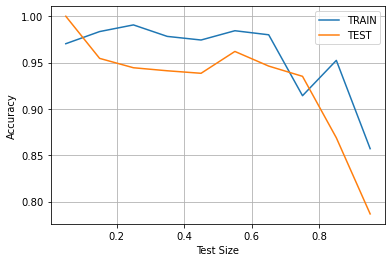

In [46]:
find_best_split_ratio( 'SVM', model = SVC(), log=True )

## Gaussian Naive Bayes

In [47]:
X_train, X_test, y_train, y_test =create_75_25_split()

In [48]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.94


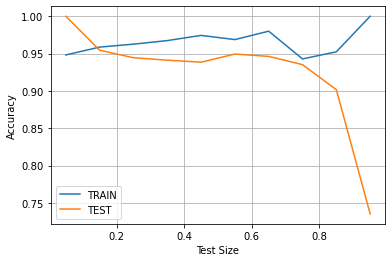

In [49]:
find_best_split_ratio( 'GNB', model = GaussianNB(), log=False )